### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.14.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [6]:
trainY2 = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY2 = tf.keras.utils.to_categorical(testY, num_classes=10)

In [7]:
print(trainY2.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [9 0 0 3 0]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

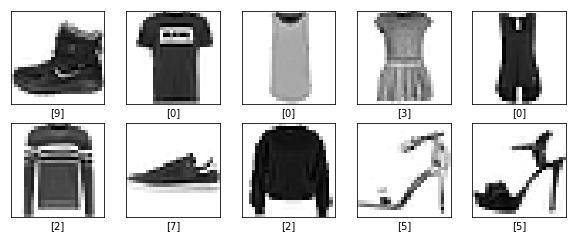

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel([trainY[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [9]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

W0928 15:46:19.836203  6720 deprecation.py:506] From E:\Anaconda\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Execute the model using model.fit()

In [10]:
model.fit(trainX, trainY2, 
          validation_data=(testX, testY2), 
          epochs=100,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 45us/sample - loss: 2041.5273 - acc: 0.7384 - val_loss: 1337.2847 - val_acc: 0.7747
Epoch 2/100
60000/60000 [==============================] - 2s 41us/sample - loss: 1654.4849 - acc: 0.7778 - val_loss: 1638.0034 - val_acc: 0.7467
Epoch 3/100
60000/60000 [==============================] - 2s 42us/sample - loss: 1553.7005 - acc: 0.7844 - val_loss: 2491.6462 - val_acc: 0.7440
Epoch 4/100
60000/60000 [==============================] - 3s 45us/sample - loss: 1499.2094 - acc: 0.7887 - val_loss: 1117.2693 - val_acc: 0.8065
Epoch 5/100
60000/60000 [==============================] - 2s 40us/sample - loss: 1475.3057 - acc: 0.7939 - val_loss: 1657.5610 - val_acc: 0.7909
Epoch 6/100
60000/60000 [==============================] - 2s 40us/sample - loss: 1510.7721 - acc: 0.7958 - val_loss: 1135.0295 - val_acc: 0.8117
Epoch 7/100
60000/60000 [==============================] - 3s 43us/sample 

60000/60000 [==============================] - 3s 43us/sample - loss: 1314.3611 - acc: 0.8132 - val_loss: 1085.8904 - val_acc: 0.8136
Epoch 57/100
60000/60000 [==============================] - 3s 42us/sample - loss: 1379.9359 - acc: 0.8102 - val_loss: 1086.5778 - val_acc: 0.8233
Epoch 58/100
60000/60000 [==============================] - 2s 40us/sample - loss: 1307.2233 - acc: 0.8129 - val_loss: 1061.7485 - val_acc: 0.8183
Epoch 59/100
60000/60000 [==============================] - 2s 40us/sample - loss: 1354.7005 - acc: 0.8105 - val_loss: 1227.7240 - val_acc: 0.7950
Epoch 60/100
60000/60000 [==============================] - 3s 42us/sample - loss: 1368.4282 - acc: 0.8105 - val_loss: 1342.6873 - val_acc: 0.8110
Epoch 61/100
60000/60000 [==============================] - 2s 41us/sample - loss: 1381.2901 - acc: 0.8102 - val_loss: 2053.9535 - val_acc: 0.7448
Epoch 62/100
60000/60000 [==============================] - 2s 41us/sample - loss: 1346.7332 - acc: 0.8126 - val_loss: 2193.1869 - 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [11]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model

In [12]:
model.fit(trainX, trainY2, 
          validation_data=(testX, testY2), 
          epochs=100,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5904 - acc: 0.7981 - val_loss: 0.5271 - val_acc: 0.8218
Epoch 2/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4899 - acc: 0.8315 - val_loss: 0.4832 - val_acc: 0.8323
Epoch 3/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4650 - acc: 0.8399 - val_loss: 0.4690 - val_acc: 0.8385
Epoch 4/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4570 - acc: 0.8429 - val_loss: 0.4763 - val_acc: 0.8326
Epoch 5/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4500 - acc: 0.8452 - val_loss: 0.4587 - val_acc: 0.8426
Epoch 6/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4431 - acc: 0.8453 - val_loss: 0.4647 - val_acc: 0.8404
Epoch 7/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4389 - acc: 0.8484 - val_l

60000/60000 [==============================] - 8s 128us/sample - loss: 0.4032 - acc: 0.8560 - val_loss: 0.4917 - val_acc: 0.8401
Epoch 59/100
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4021 - acc: 0.8583 - val_loss: 0.4750 - val_acc: 0.8419
Epoch 60/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4031 - acc: 0.8585 - val_loss: 0.4898 - val_acc: 0.8415
Epoch 61/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4009 - acc: 0.8582 - val_loss: 0.4677 - val_acc: 0.8403
Epoch 62/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4033 - acc: 0.8576 - val_loss: 0.4811 - val_acc: 0.8428
Epoch 63/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4022 - acc: 0.8589 - val_loss: 0.4675 - val_acc: 0.8438
Epoch 64/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4037 - acc: 0.8575 - val_loss: 0.4976 - val_acc: 0.8410
Epoch 65/100
60000/60000

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [13]:
from keras import optimizers

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
sgd = optimizers.SGD(lr=0.001)
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
model.fit(trainX, trainY2, 
          validation_data=(testX, testY2), 
          epochs=100,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 122us/sample - loss: 0.6022 - acc: 0.7927 - val_loss: 0.5165 - val_acc: 0.8215
Epoch 2/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4911 - acc: 0.8304 - val_loss: 0.4944 - val_acc: 0.8313
Epoch 3/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4689 - acc: 0.8387 - val_loss: 0.4965 - val_acc: 0.8322
Epoch 4/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4566 - acc: 0.8426 - val_loss: 0.4818 - val_acc: 0.8348
Epoch 5/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4491 - acc: 0.8451 - val_loss: 0.4682 - val_acc: 0.8347
Epoch 6/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4420 - acc: 0.8466 - val_loss: 0.4679 - val_acc: 0.8369
Epoch 7/100
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4404 - acc: 0.8475 - val

Epoch 59/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4010 - acc: 0.8594 - val_loss: 0.4916 - val_acc: 0.8401
Epoch 60/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4056 - acc: 0.8560 - val_loss: 0.4706 - val_acc: 0.8404
Epoch 61/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4033 - acc: 0.8572 - val_loss: 0.4654 - val_acc: 0.8414
Epoch 62/100
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4039 - acc: 0.8572 - val_loss: 0.4710 - val_acc: 0.8400
Epoch 63/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4024 - acc: 0.8578 - val_loss: 0.4977 - val_acc: 0.8439
Epoch 64/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4025 - acc: 0.8576 - val_loss: 0.4780 - val_acc: 0.8400
Epoch 65/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4012 - acc: 0.8586 - val_loss: 0.4671 - val_acc: 0.8404
Epoch 66/100

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [15]:
#Initialize Sequential model

model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

sgd = optimizers.SGD(lr=0.03)

In [16]:
#First Dense Layer
model.add(tf.keras.layers.Dense(10))

In [17]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [18]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [19]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

## Review model

In [20]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 23,196
Trainable params: 21,628
Non-trainable params: 1,568
______________________________________________

### Run the model

In [22]:
model.fit(trainX, trainY2, 
          validation_data=(testX, testY2), 
          epochs=100,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 84us/sample - loss: 1.7060 - acc: 0.4579 - val_loss: 1.1423 - val_acc: 0.6297
Epoch 2/100
60000/60000 [==============================] - 8s 130us/sample - loss: 0.9574 - acc: 0.6818 - val_loss: 0.7920 - val_acc: 0.7296
Epoch 3/100
60000/60000 [==============================] - 5s 78us/sample - loss: 0.7346 - acc: 0.7366 - val_loss: 0.6639 - val_acc: 0.7545
Epoch 4/100
60000/60000 [==============================] - 8s 127us/sample - loss: 0.6401 - acc: 0.7692 - val_loss: 0.5944 - val_acc: 0.7822
Epoch 5/100
60000/60000 [==============================] - 5s 78us/sample - loss: 0.5819 - acc: 0.7947 - val_loss: 0.5512 - val_acc: 0.8031
Epoch 6/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5449 - acc: 0.8093 - val_loss: 0.5255 - val_acc: 0.8139
Epoch 7/100
60000/60000 [==============================] - 9s 143us/sample - loss: 0.5198 - acc: 0.8175 - va

60000/60000 [==============================] - 5s 80us/sample - loss: 0.3563 - acc: 0.8718 - val_loss: 0.3864 - val_acc: 0.8599
Epoch 59/100
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3571 - acc: 0.8715 - val_loss: 0.3874 - val_acc: 0.8617
Epoch 60/100
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3546 - acc: 0.8726 - val_loss: 0.3856 - val_acc: 0.8595
Epoch 61/100
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3533 - acc: 0.8731 - val_loss: 0.3854 - val_acc: 0.8612
Epoch 62/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3530 - acc: 0.8734 - val_loss: 0.3850 - val_acc: 0.8598
Epoch 63/100
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3505 - acc: 0.8735 - val_loss: 0.3874 - val_acc: 0.8616
Epoch 64/100
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3506 - acc: 0.8732 - val_loss: 0.3857 - val_acc: 0.8616
Epoch 65/100
60000/60000